In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [83]:
class Perceptron:
    """
    Perceptron neuron
    """
    def predict(self, x: np.array) -> int:
      return np.where(self.f(x) >= 0.0, 1, -1)
    def __init__(self, learning_rate=0.1):
        """
        instantiate a new Perceptron

        :param learning_rate: coefficient used to tune the model
        response to training data
        """
        self.learning_rate = learning_rate
        self._b = 0.0  # y-intercept
        self._w = None  # weights assigned to input features
        # count of errors during each iteration
        self.misclassified_samples = []

    def fit(self, x: np.array, y: np.array, n_iter=10):
        """
        fit the Perceptron model on the training data

        :param x: samples to fit the model on
        :param y: labels of the training samples
        :param n_iter: number of training iterations 
        """
        self._b = 0.0
        self._w = np.zeros(x.shape[1])
        self.misclassified_samples = []

        for _ in range(n_iter):
            # counter of the errors during this training iteration
            errors = 0
            for xi, yi in zip(x, y):
                # for each sample compute the update value
                update = self.learning_rate * (yi - self.predict(xi))
                # and apply it to the y-intercept and weights array
                self._b += update
                self._w += update * xi
                errors += int(update != 0.0)

            self.misclassified_samples.append(errors)

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)


In [84]:
df = pd.read_csv('iris.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [86]:
x = df.iloc[:100, 0:2].values # reduce the dimensionality of the data
y = df.iloc[:100 ,4].values

In [87]:
y = np.where(y == 'Setosa', 1, -1)

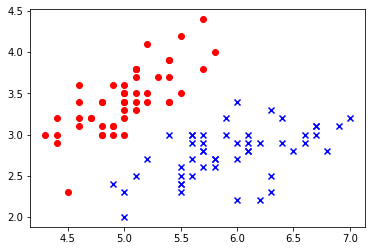

In [88]:
plt.scatter(x[1:50, 0], x[1:50, 1], color='red', marker='o', label='Setosa')
# plot Iris Versicolour samples
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x',
            label='Versicolour')
plt.show()

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)


In [91]:
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

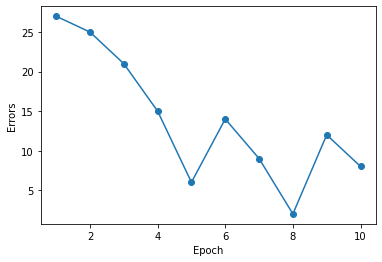

In [92]:
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

In [93]:
from sklearn.metrics import accuracy_score
print("accuracy %f" % accuracy_score(classifier.predict(x_test), y_test))

accuracy 0.720000


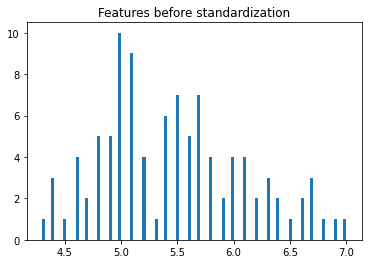

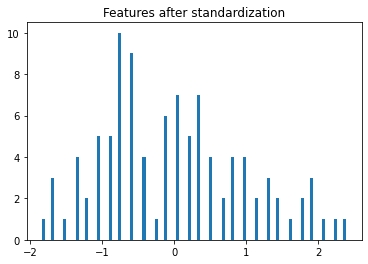

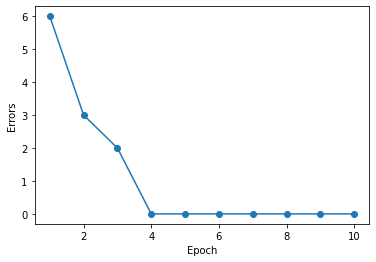

In [94]:
# plot the first feature before standardization
plt.hist(x[:, 0], bins=100)
plt.title("Features before standardization")
plt.show()

# standardization of the two features
x[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

# features after standardization
plt.hist(x[:, 0], bins=100)
plt.title("Features after standardization")
plt.show()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,
                                                    random_state=0)

# train the model
classifier = Perceptron(learning_rate=0.01)
classifier.fit(x_train, y_train)

# plot the number of errors during each iteration
plt.plot(range(1, len(classifier.misclassified_samples) + 1),
         classifier.misclassified_samples, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Errors')
plt.show()

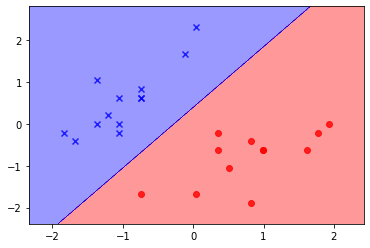

In [95]:
def plot_decision_regions(x, y):
    resolution = 0.001
    
    # define a set of markers
    markers = ('o', 'x')
    # define available colors
    cmap = ListedColormap(('red', 'blue'))
    
    # select a range of x containing the scaled test set
    x1_min, x1_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
    x2_min, x2_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
    
    # create a grid of values to test the classifier on
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # plot the decision region...
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # ...and the points from the test set
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x=x[y == c1, 0],
                    y=x[y == c1, 1], 
                    alpha=0.8, 
                    c=cmap(idx), 
                    marker=markers[idx], 
                    label=c1)
    plt.show()


plot_decision_regions(x_test, y_test)

Iteration 0: accuracy 1.000000


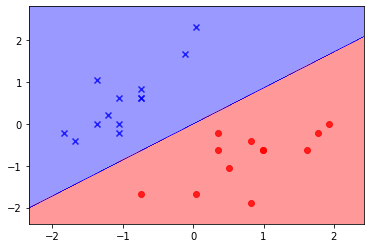

Iteration 1: accuracy 1.000000


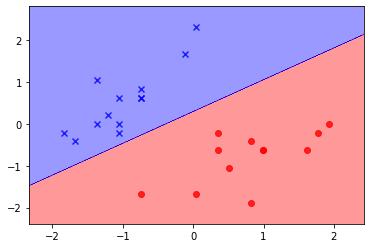

Iteration 2: accuracy 1.000000


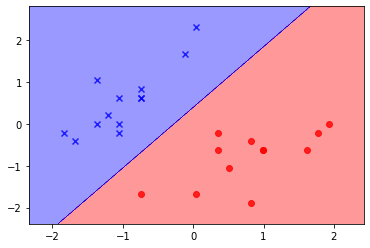

Iteration 3: accuracy 1.000000


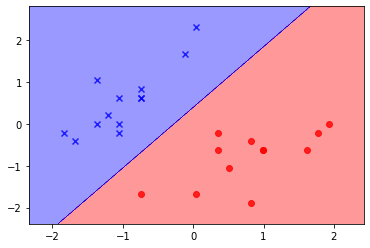

Iteration 4: accuracy 1.000000


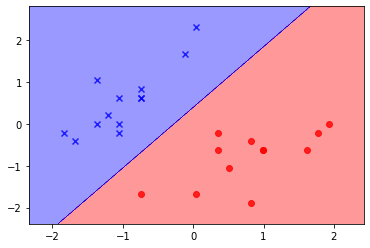

Iteration 5: accuracy 1.000000


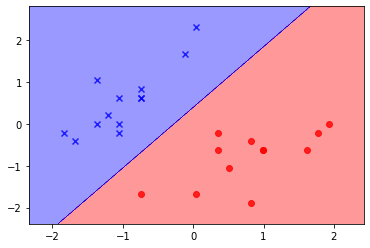

Iteration 6: accuracy 1.000000


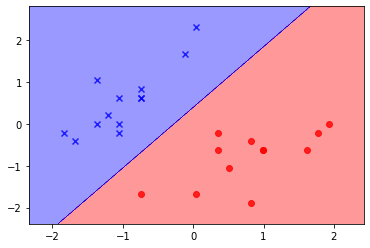

Iteration 7: accuracy 1.000000


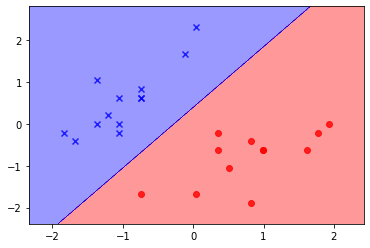

Iteration 8: accuracy 1.000000


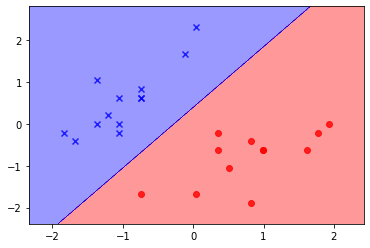

Iteration 9: accuracy 1.000000


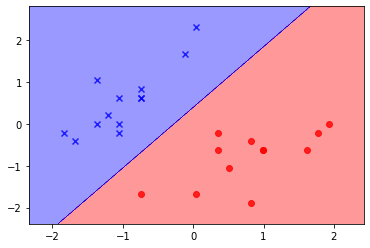

In [96]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_features=1):
        self.learning_rate = learning_rate
        self._b = 0.0
        self._w = np.zeros(n_features)
        self.misclassified_samples = []

    def f(self, x: np.array) -> float:
        """
        compute the output of the neuron
        :param x: input features
        :return: the output of the neuron
        """
        return np.dot(x, self._w) + self._b

    def predict(self, x: np.array):
        """
        convert the output of the neuron to a binary output
        :param x: input features
        :return: 1 if the output for the sample is positive (or zero),
        -1 otherwise
        """
        return np.where(self.f(x) >= 0, 1, -1)

    def fit(self, x: np.array, y: np.array, n_iter=1):
        for _ in range(n_iter):
            errors = 0  # errors during this iteration

            for xi, yi in zip(x, y):
                update = self.learning_rate * (yi - self.predict(xi))
                self._b += update
                self._w += update * xi

                errors += int(update != 0.0)
            self.misclassified_samples.append(errors)
        return self

    ...


classifier = Perceptron(learning_rate=0.001, n_features=2)
for i in range(0, 10):
    classifier.fit(x_train, y_train)
    accuracy = accuracy_score(classifier.predict(x_test), y_test)
    print("Iteration %d: accuracy %f" % (i, accuracy))
    plot_decision_regions(x_test, y_test)